# PART 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift


In [3]:
dt = 0.001 #sampling rate
t = np.arange(0,1,dt)
F=20

In [4]:
y = 5.*np.sin(2*np.pi*F*t) + 3.*np.sin(2*np.pi*.5*F*t)+ 12.*np.sin(2*np.pi*2*F*t)
len(y)

1000

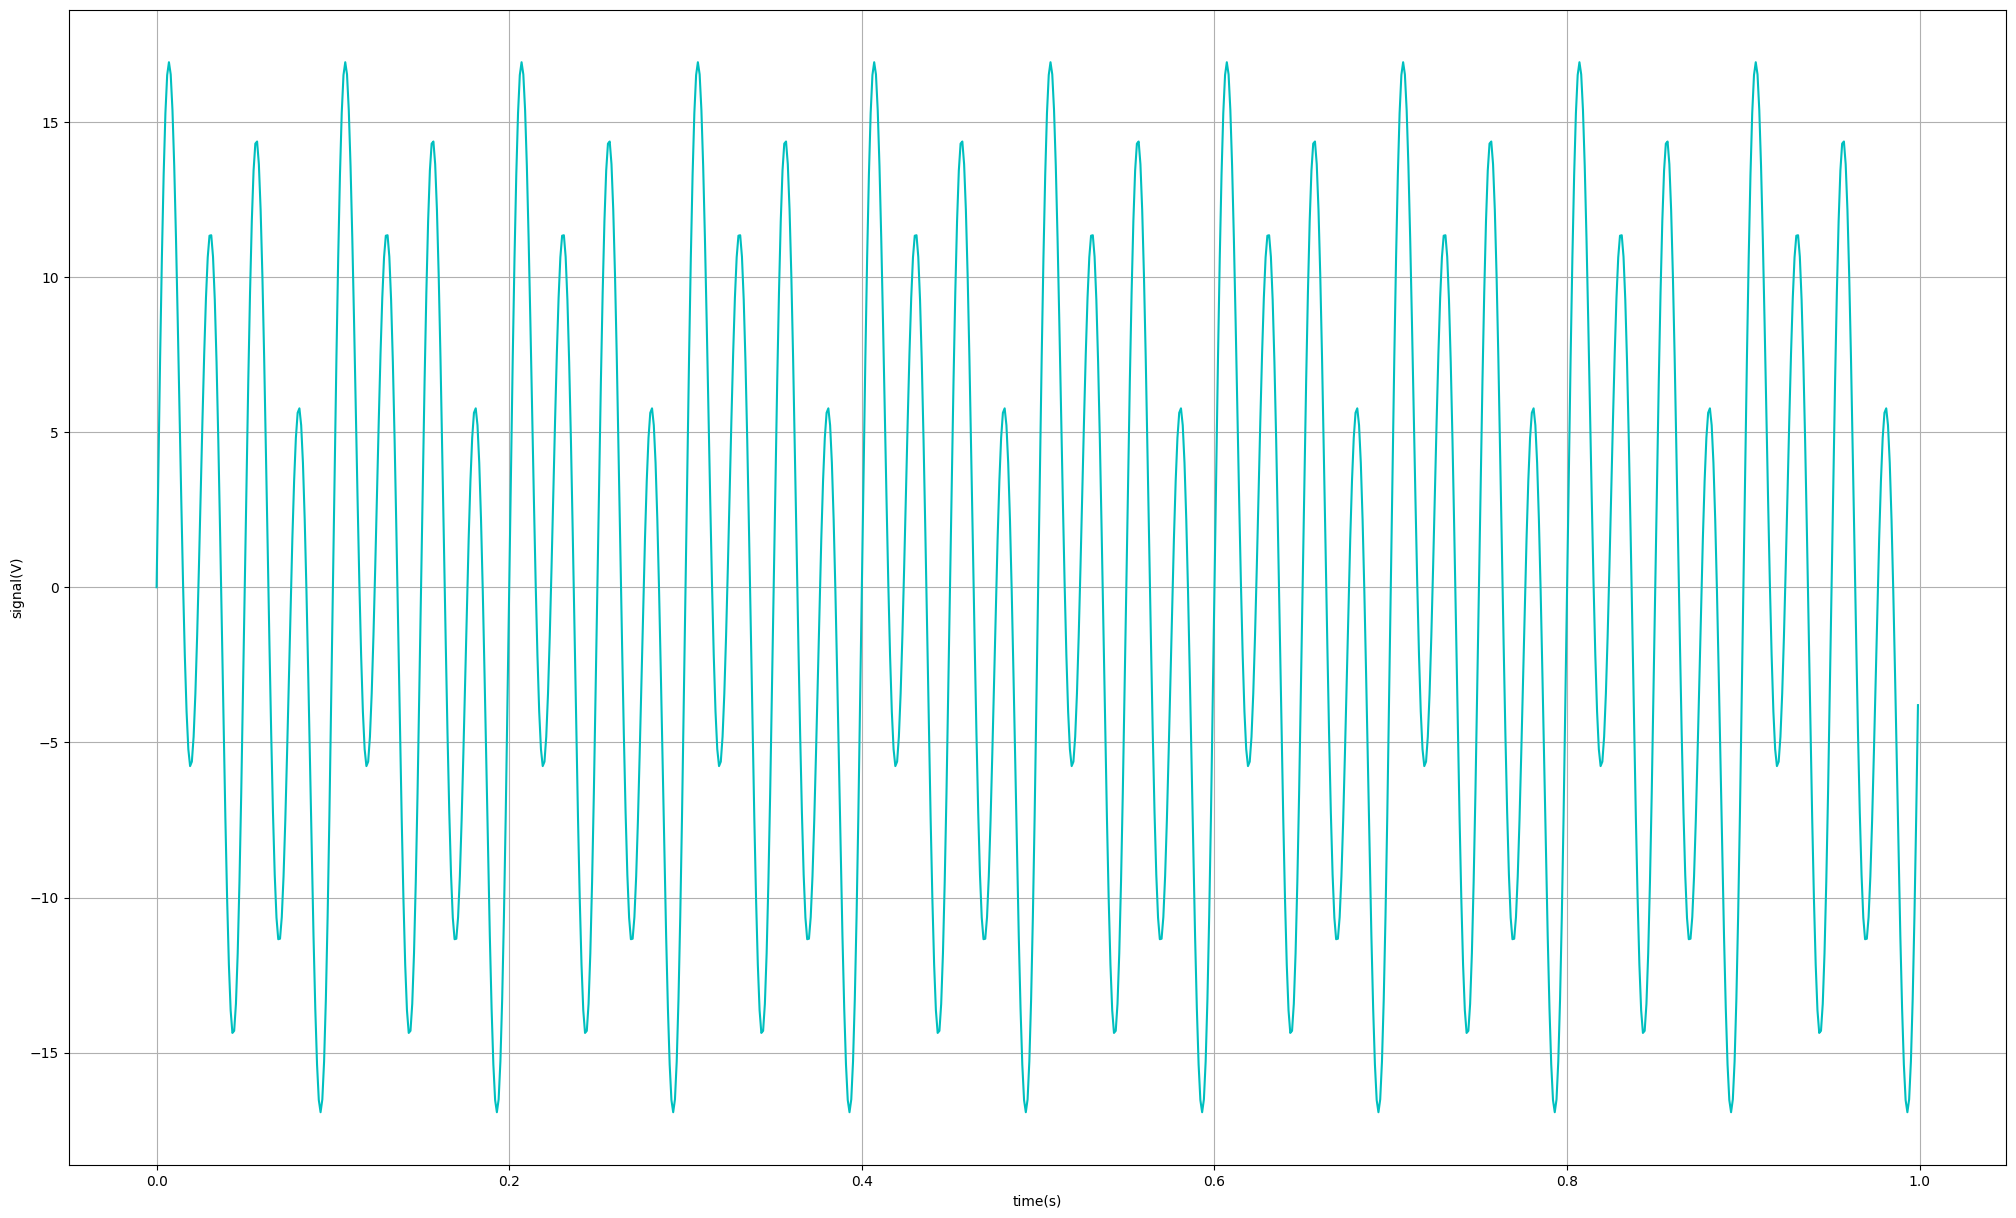

In [5]:
plt.figure(figsize=(25,15))
plt.plot(t,y,color='c')
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
ax = plt.gca()
plt.show()

In [6]:
n=len(y)
f_fft = np.fft.fft(y,n)
psd = f_fft * np.conj(f_fft)
freq = (1/(dt*n)) * np.arange(n) 
L = np.arange (1.,np.floor(n/2),dtype='int')



c:\Users\user\miniconda3\envs\tf\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


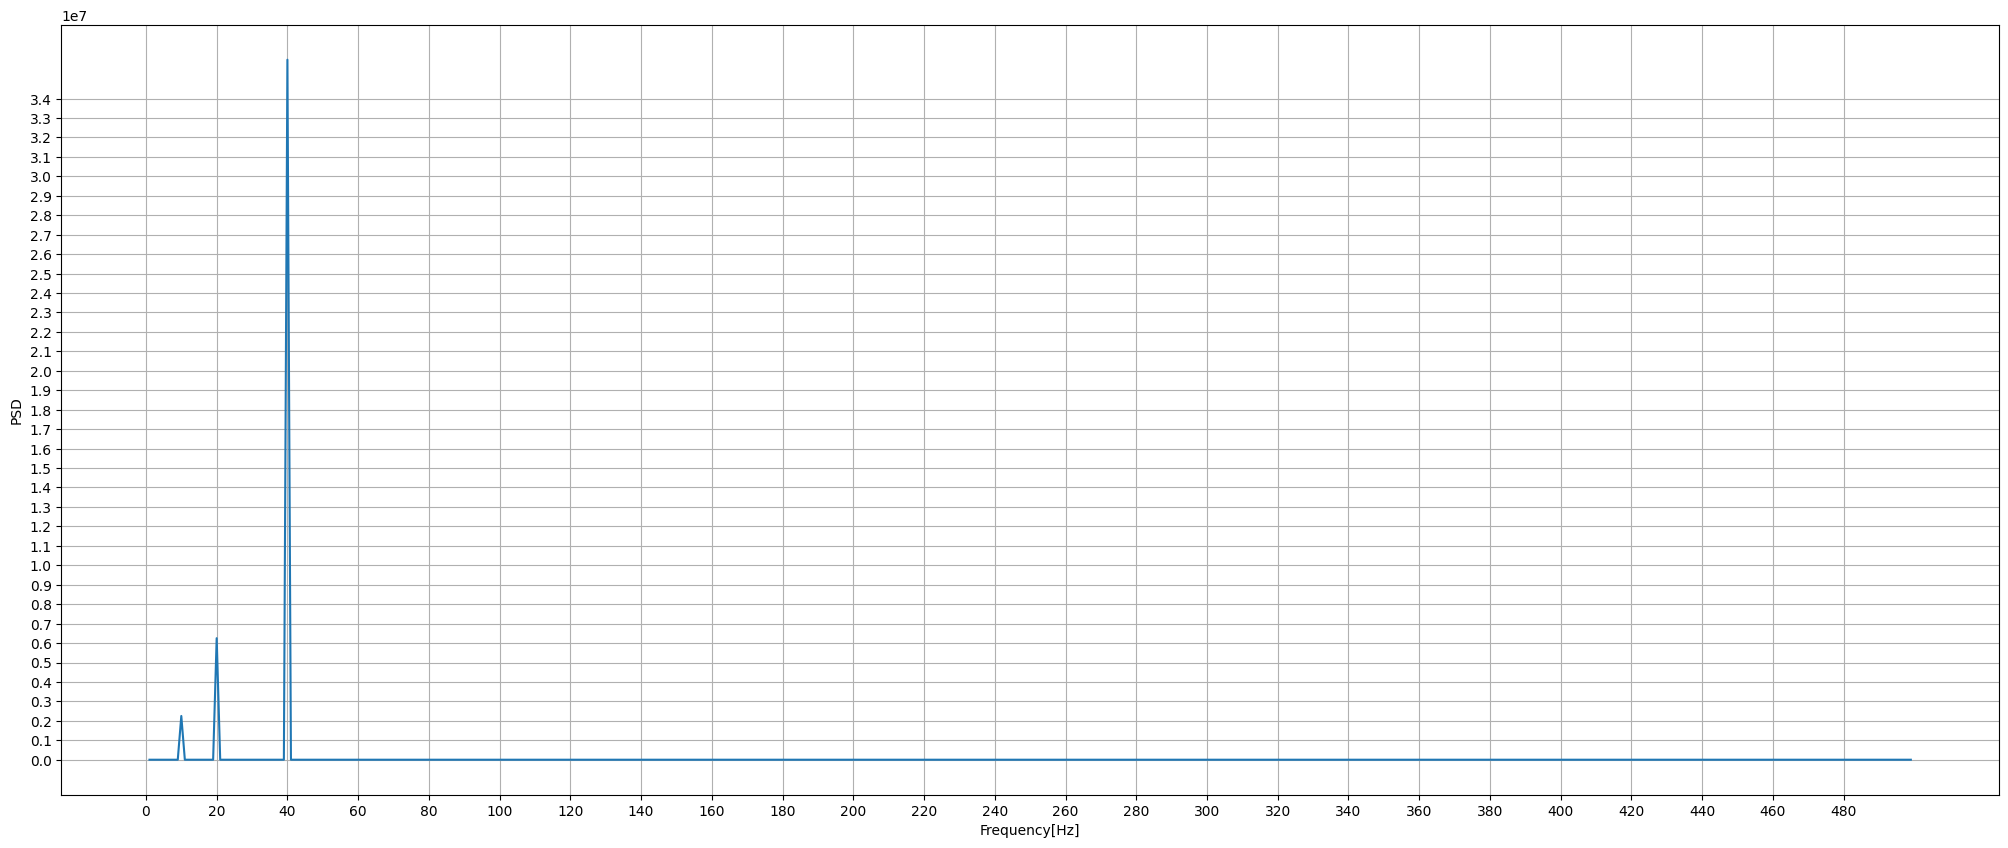

In [7]:
plt.figure(figsize=(25,10))
plt.grid(True)
ax = plt.gca()
plt.plot(freq[L],psd[L])
plt.yticks(np.arange(0, 3.5e7, step=.1e7))
plt.xticks(np.arange(0, 500, step=20))
plt.xlabel("Frequency[Hz]",position=(0.95,1))
plt.ylabel("PSD",position=(1,0.8))
plt.show()

# Part 2

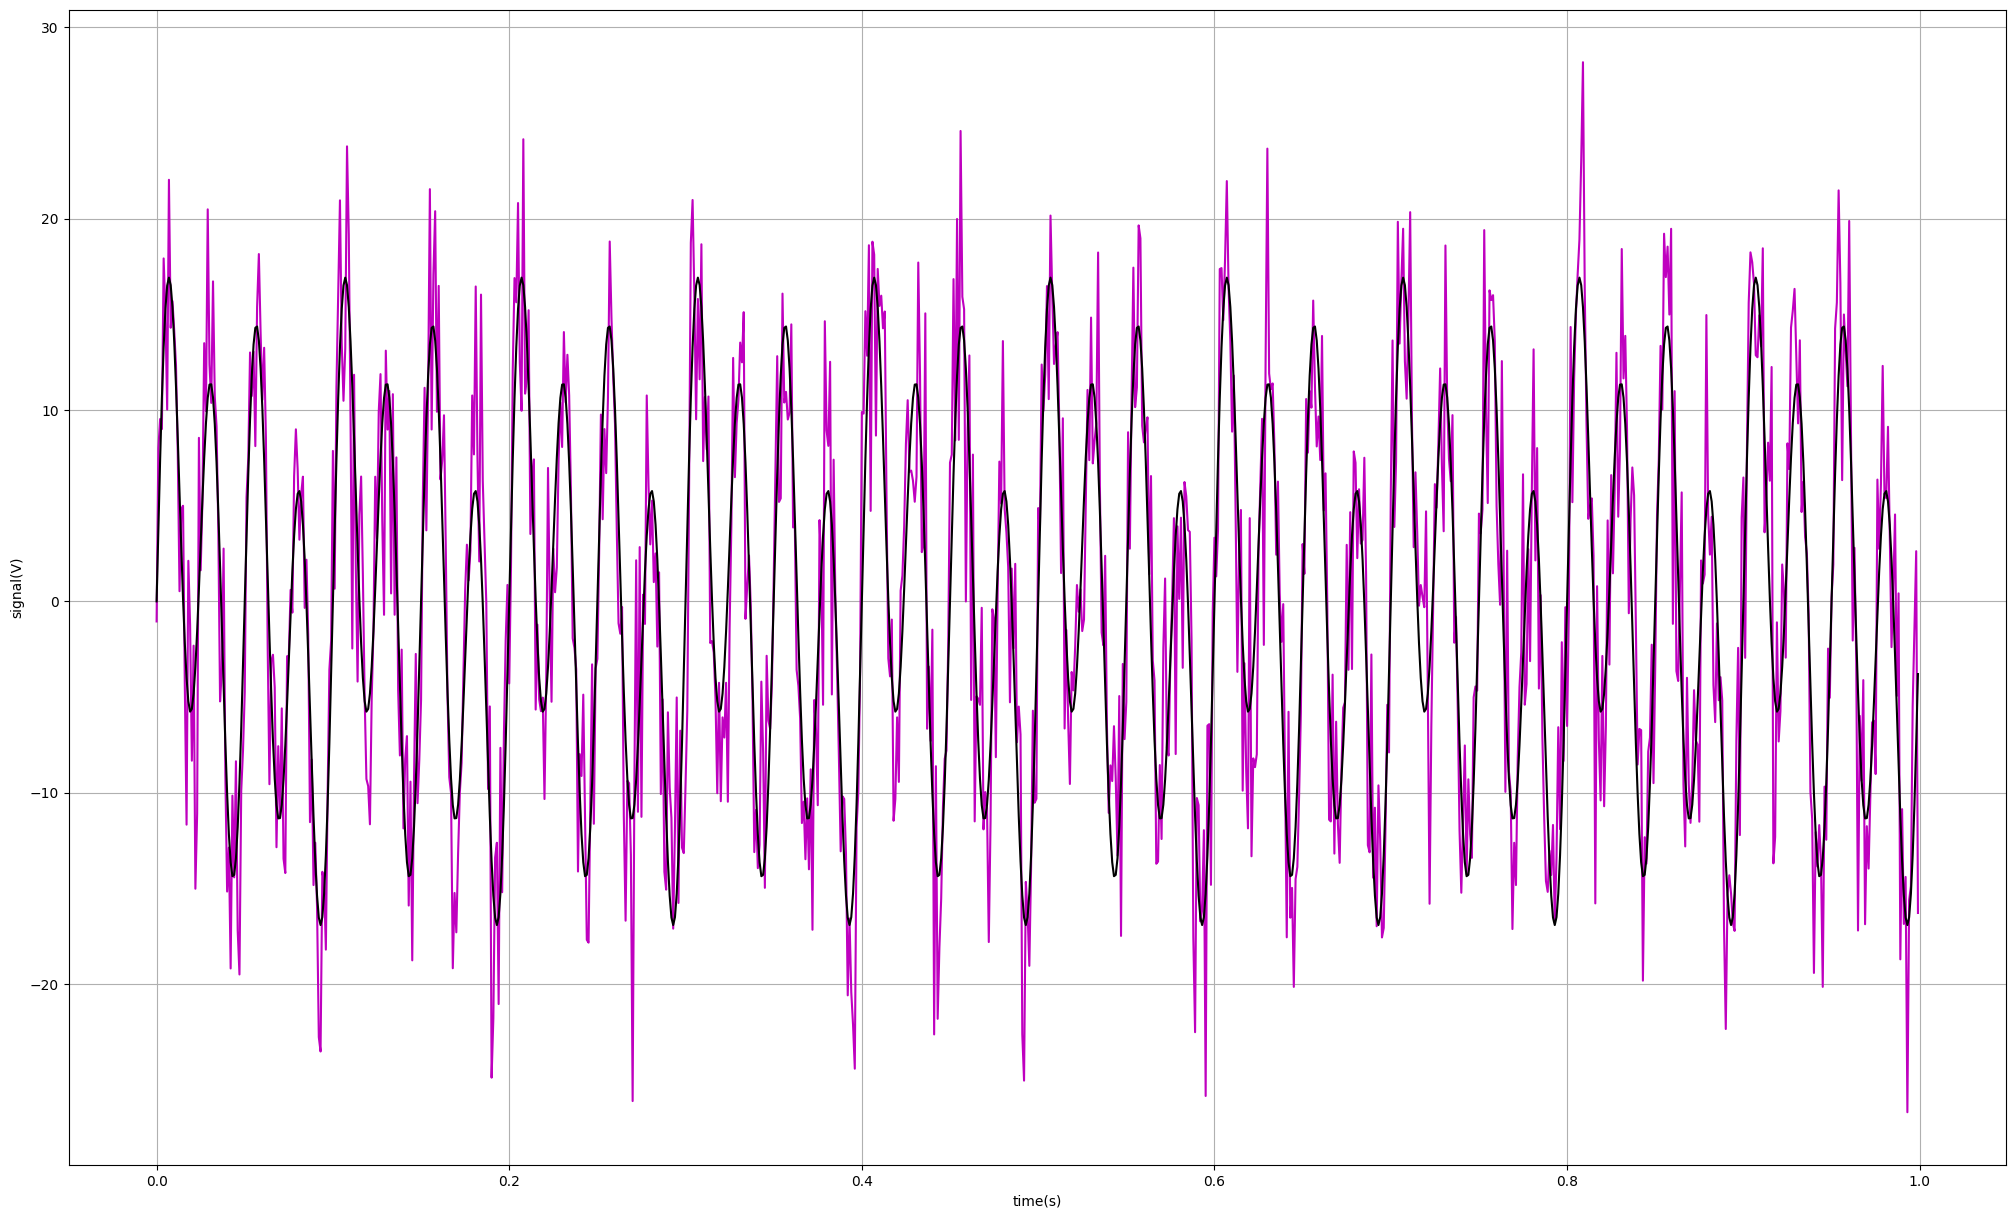

In [8]:
noise = np.random.normal(0,5,len(y))
noisy = y + noise

plt.figure(figsize=(25,15))
plt.plot(t,noisy,color='m')
plt.plot(t,y,color='k')
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
ax = plt.gca()

plt.show()

In [9]:
noise = np.random.normal(0,5,len(y))
noisy = y + noise

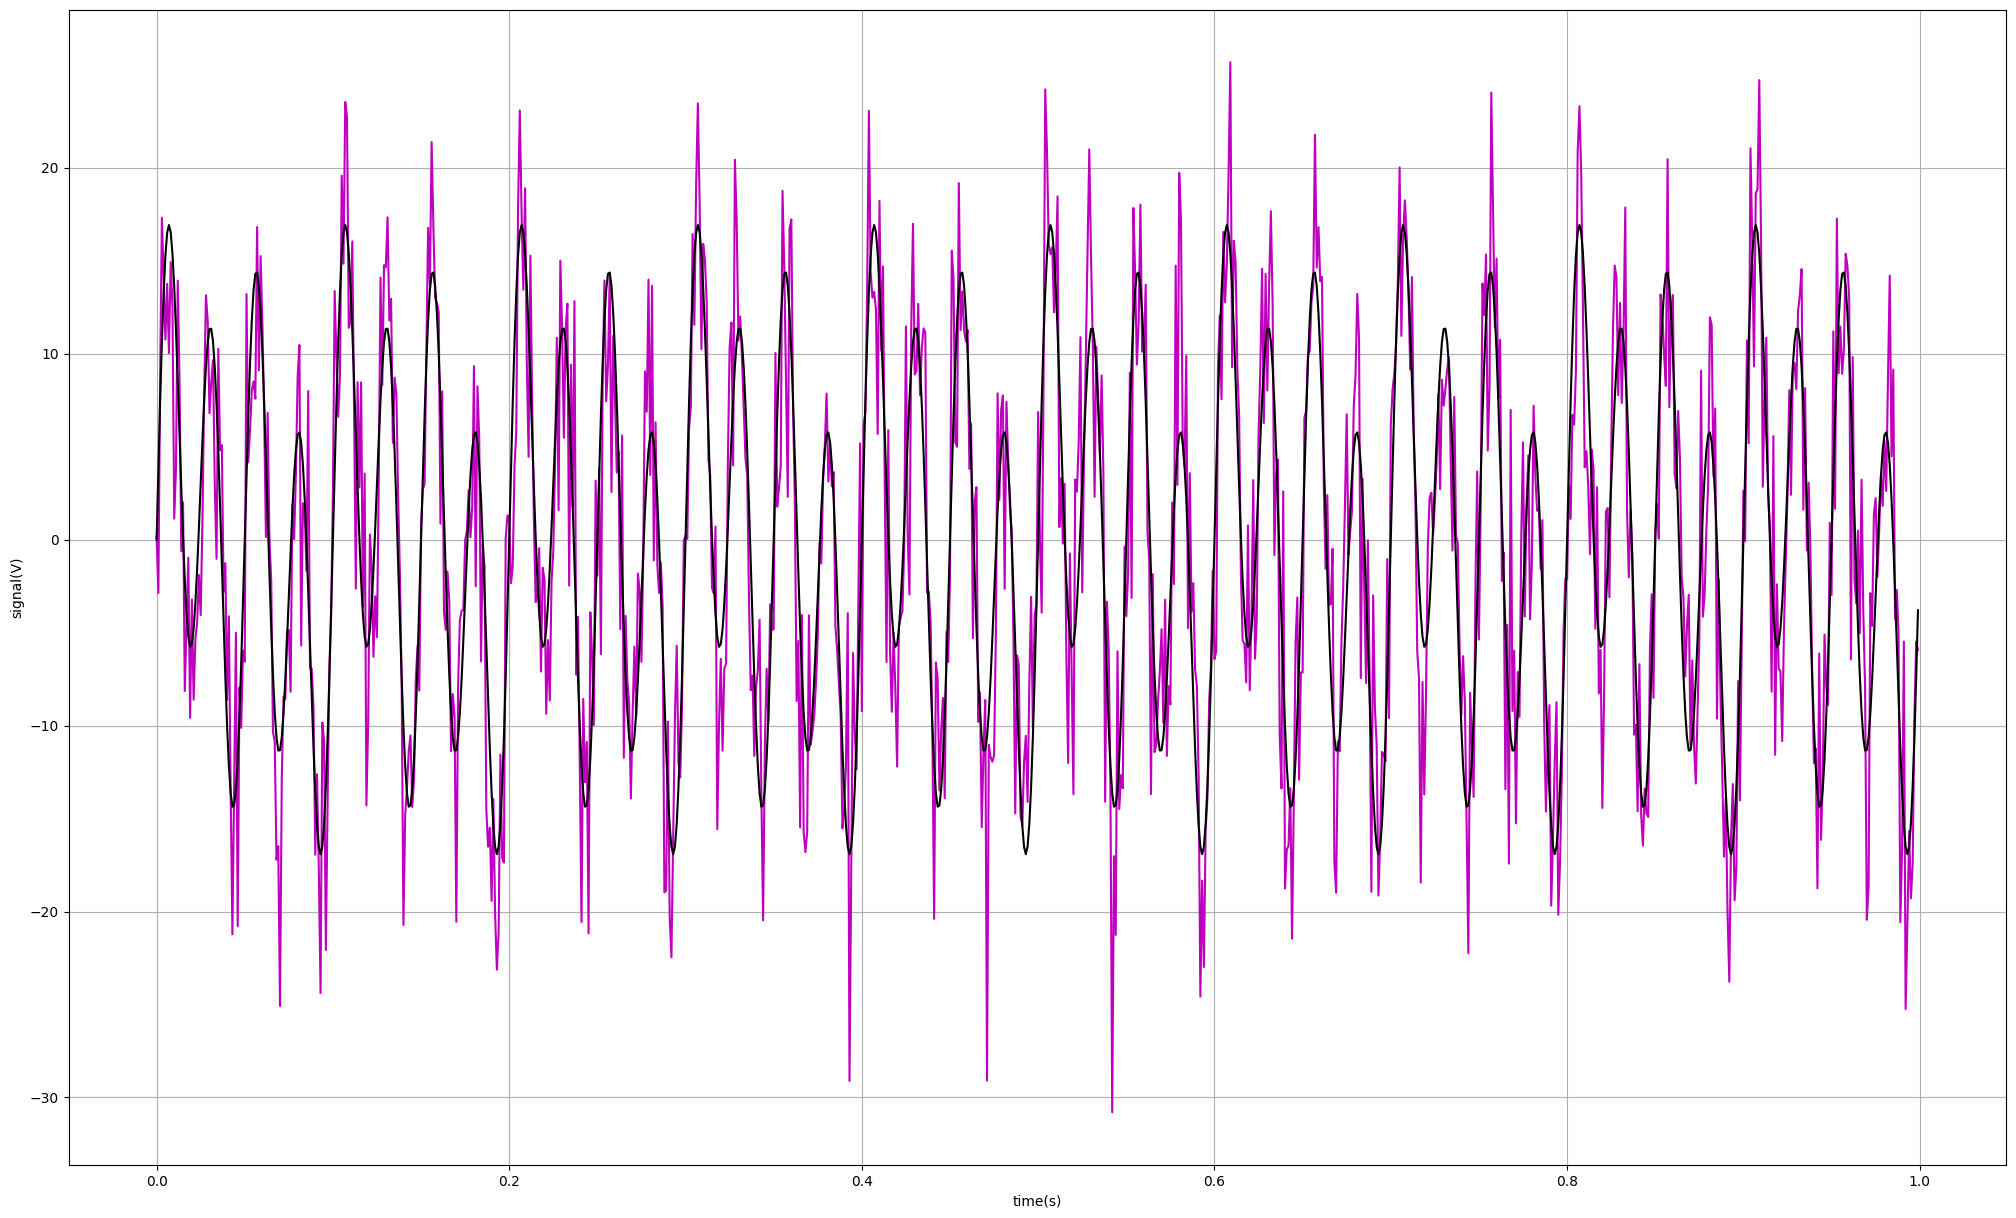

In [10]:
noise = np.random.normal(0,5,len(y))
noisy = y + noise

plt.figure(figsize=(25,15))
plt.plot(t,noisy,color='m')
plt.plot(t,y,color='k')
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
ax = plt.gca()

plt.show()

In [11]:
n=len(noisy)
f_fft = np.fft.fft(noisy,n)
psd = f_fft * np.conj(f_fft)
freq = (1/(dt*n)) * np.arange(n) 
L = np.arange (1.,np.floor(n/2),dtype='int')



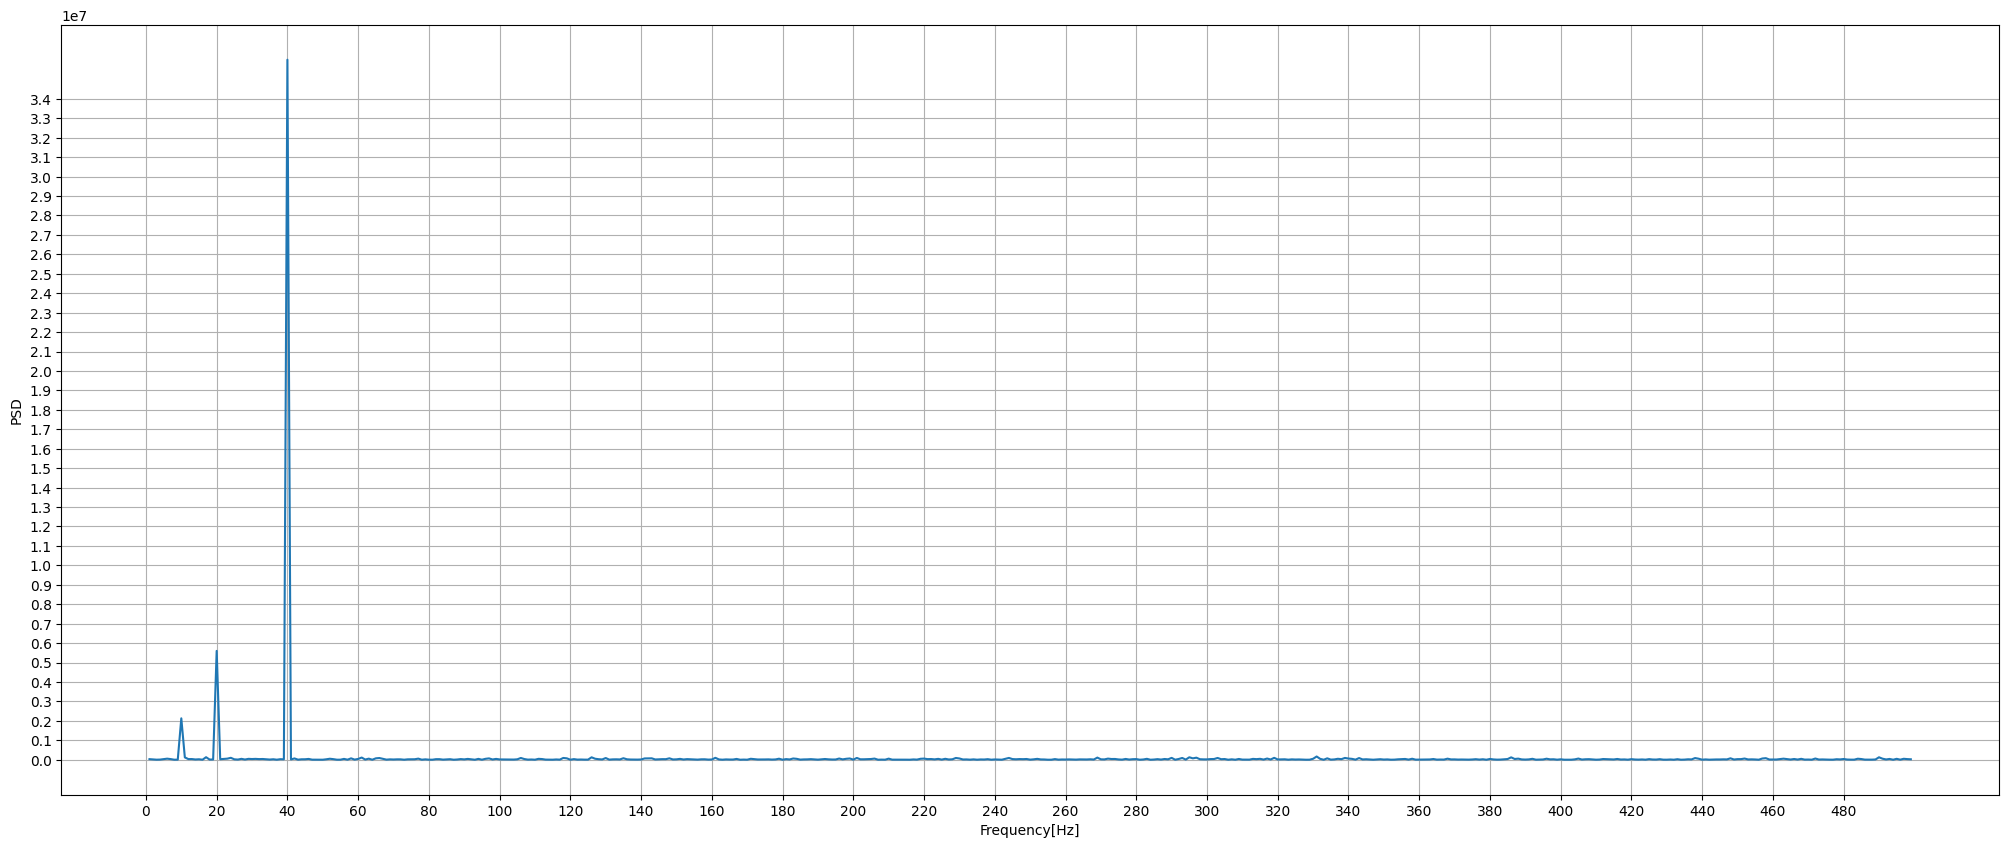

In [12]:
plt.figure(figsize=(25,10))
plt.grid(True)
ax = plt.gca()
plt.plot(freq[L],psd[L])
plt.yticks(np.arange(0, 3.5e7, step=.1e7))
plt.xticks(np.arange(0, 500, step=20))
plt.xlabel("Frequency[Hz]",position=(0.95,1))
plt.ylabel("PSD",position=(1,0.8))
plt.show()

DENOISING ACTIVITY STARTS HERE

In [13]:
indices = psd > .1e7
cleaned = indices * psd
tbr = f_fft * indices


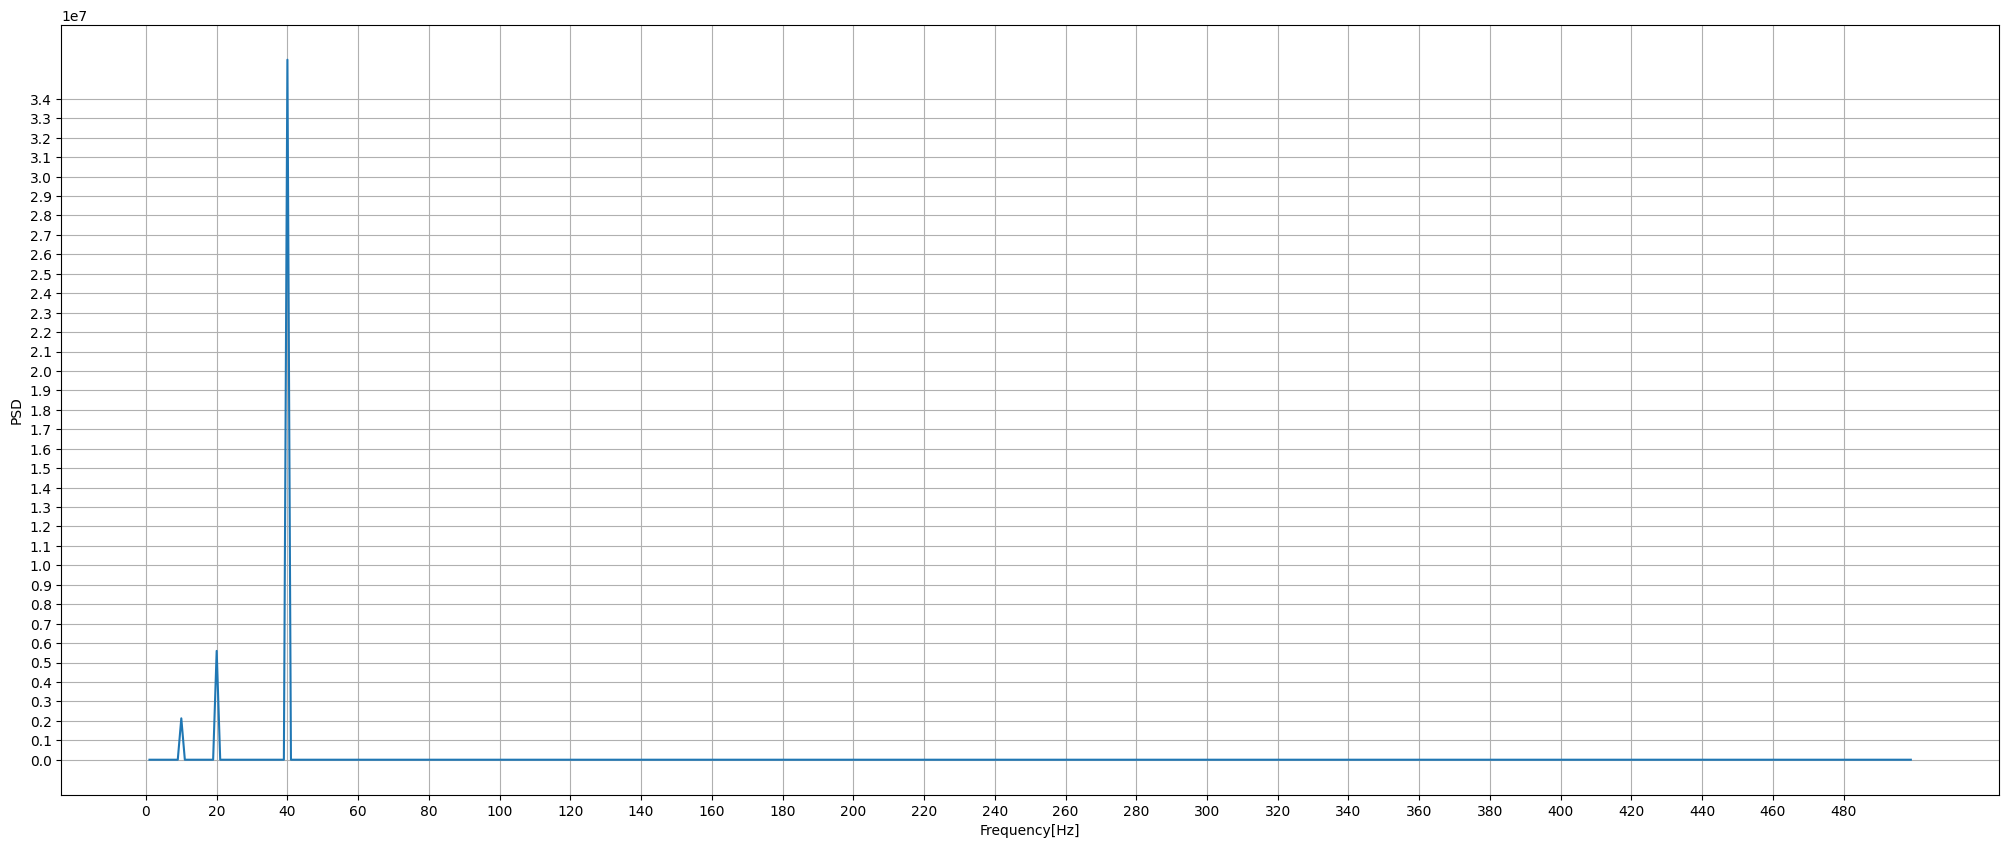

In [14]:
plt.figure(figsize=(25,10))
plt.grid(True)
ax = plt.gca()
plt.plot(freq[L],cleaned[L])
plt.yticks(np.arange(0, 3.5e7, step=.1e7))
plt.xticks(np.arange(0, 500, step=20))
plt.xlabel("Frequency[Hz]",position=(0.95,1))
plt.ylabel("PSD",position=(1,0.8))
plt.show()

In [15]:
fz = np.nonzero(cleaned[L])
fz

(array([ 9, 19, 39], dtype=int64),)

In [16]:
recons=np.fft.ifft(tbr)

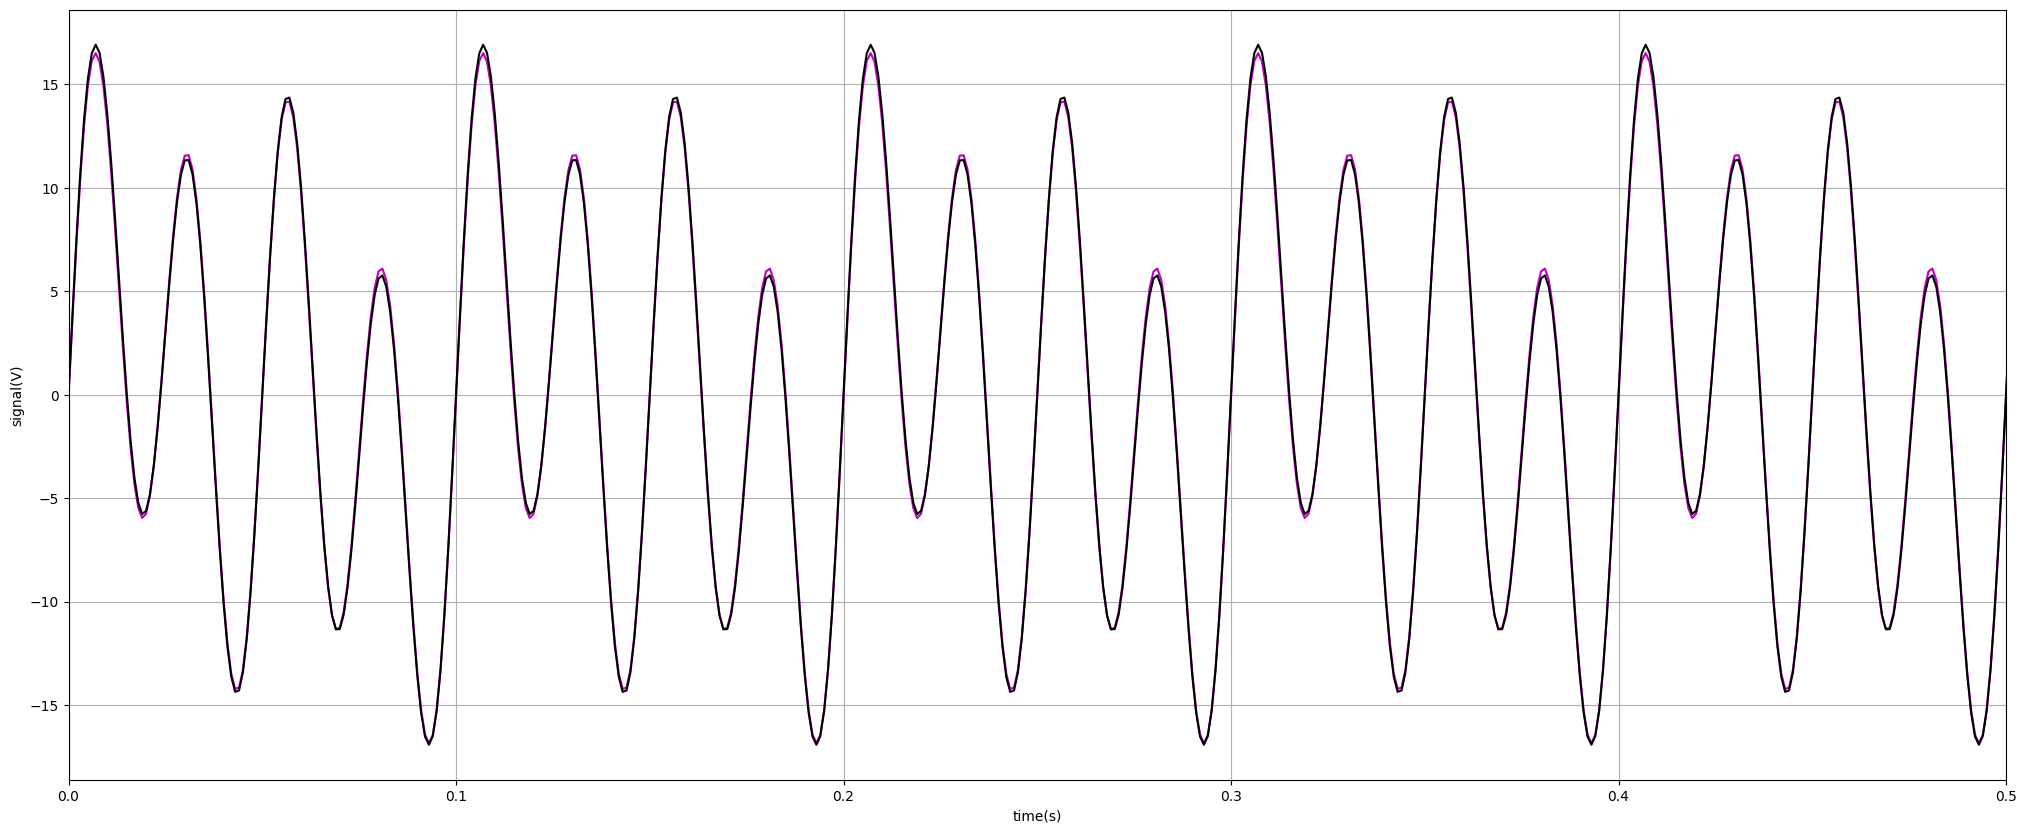

In [40]:
plt.figure(figsize=(25,10))
plt.plot(t,recons,color='m')
plt.plot(t,y,color='k')
plt.grid(True)
plt.xlim(0,.5)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
ax = plt.gca()

plt.show()

# PART 3

In [18]:
import os 
import csv

In [34]:
dataPath = "..\dataset for kids-20230919T000215Z-001\dataset for kids"

dataFiles = os.listdir(dataPath)
dataFilesPath = [os.path.join(dataPath,file) for file in dataFiles if 
                 file.split(".")[0].split("_")[-1]=="B1" and "BaseNoise" not in file and "csv" in file]

print("Number of files to process:", len(dataFilesPath))


Number of files to process: 196


In [35]:
## SORTING
def sorter(p):
    ## Extract step number from file name
    return int(p.split("_")[-2])

## SORT ALL FILES BY STEP
dataFilesPath.sort(key=sorter)

In [36]:
dataFilesPath = dataFilesPath[::25][1:]
len(dataFilesPath)

7

In [37]:
dataFilesPath

['..\\dataset for kids-20230919T000215Z-001\\dataset for kids\\G1_Hd1_FTDS_SP1_050418_162003_1_0_25_B1.csv',
 '..\\dataset for kids-20230919T000215Z-001\\dataset for kids\\G1_Hd1_FTDS_SP1_050418_162003_1_0_50_B1.csv',
 '..\\dataset for kids-20230919T000215Z-001\\dataset for kids\\G1_Hd1_FTDS_SP1_050418_162003_1_0_75_B1.csv',
 '..\\dataset for kids-20230919T000215Z-001\\dataset for kids\\G1_Hd1_FTDS_SP1_050418_162003_1_0_100_B1.csv',
 '..\\dataset for kids-20230919T000215Z-001\\dataset for kids\\G1_Hd1_FTDS_SP1_050418_162003_1_0_125_B1.csv',
 '..\\dataset for kids-20230919T000215Z-001\\dataset for kids\\G1_Hd1_FTDS_SP1_050418_162003_1_0_150_B1.csv',
 '..\\dataset for kids-20230919T000215Z-001\\dataset for kids\\G1_Hd1_FTDS_SP1_050418_162003_1_0_175_B1.csv']

In [38]:
def getDataPoints(filepath):
    ## GETTING DATA FROM CSV FILE
    dataPoints = []
    idx = []
    with open(filepath) as f:
        reader = csv.reader(f)
        for i in range(6): next(reader)
        for row in reader:
            if len(row) > 0: 
                idx.append(row[0])
                dataPoints.append(row[1])

    dataPoints = np.array(dataPoints, dtype=float)
    idx = np.array(idx, dtype=float)
    return idx,dataPoints

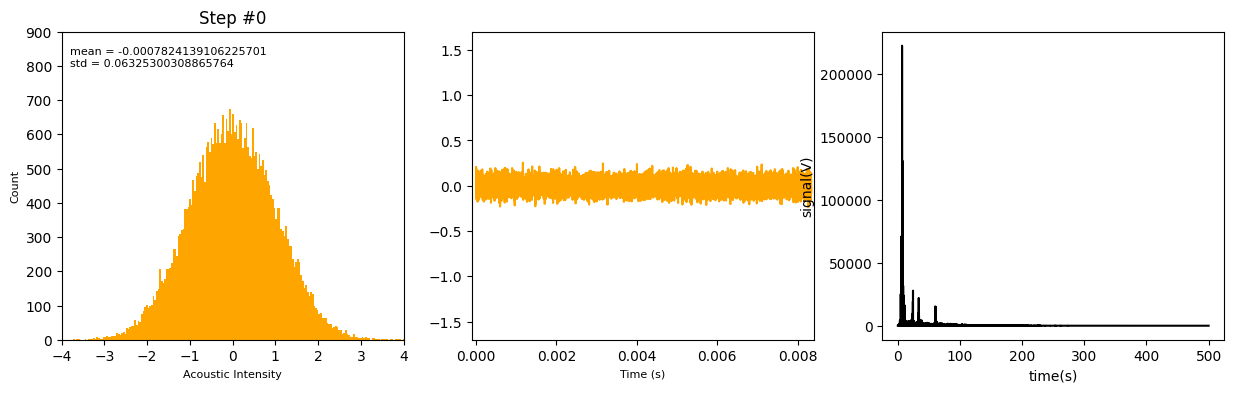

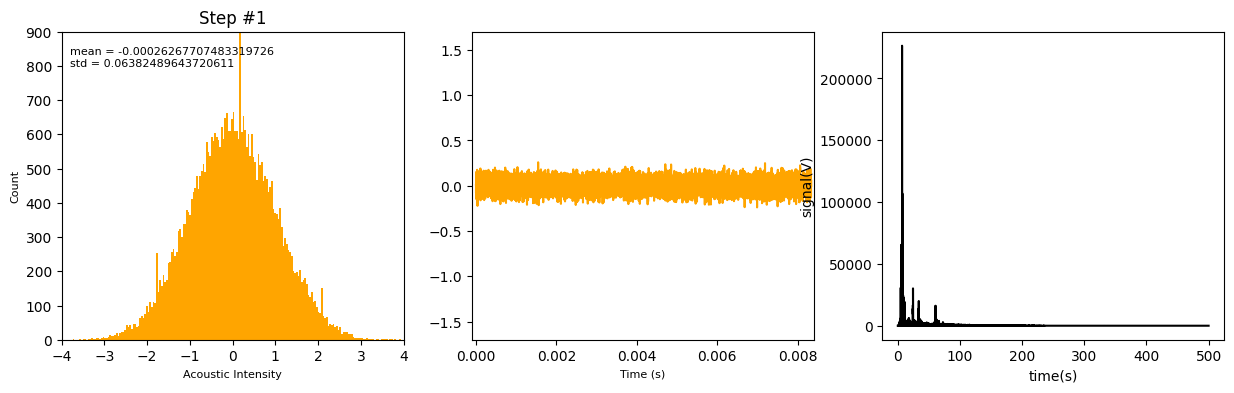

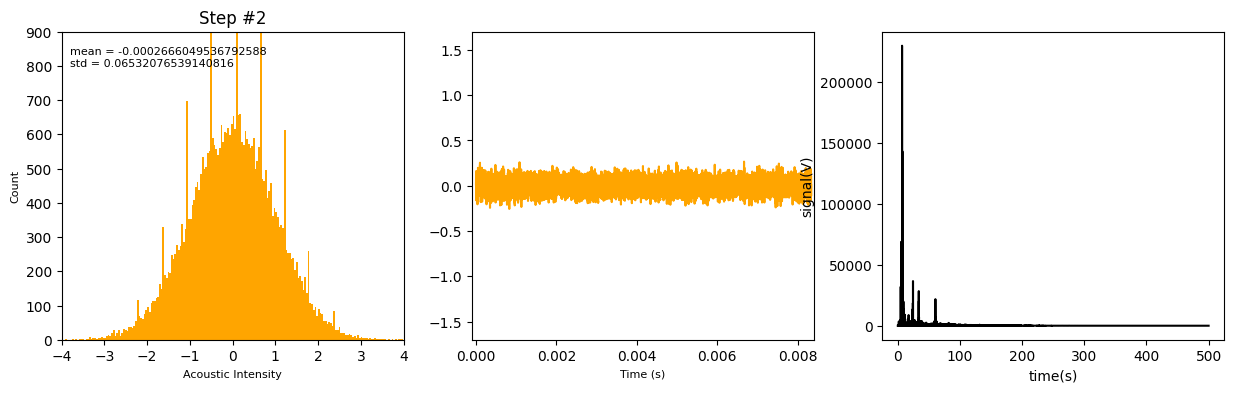

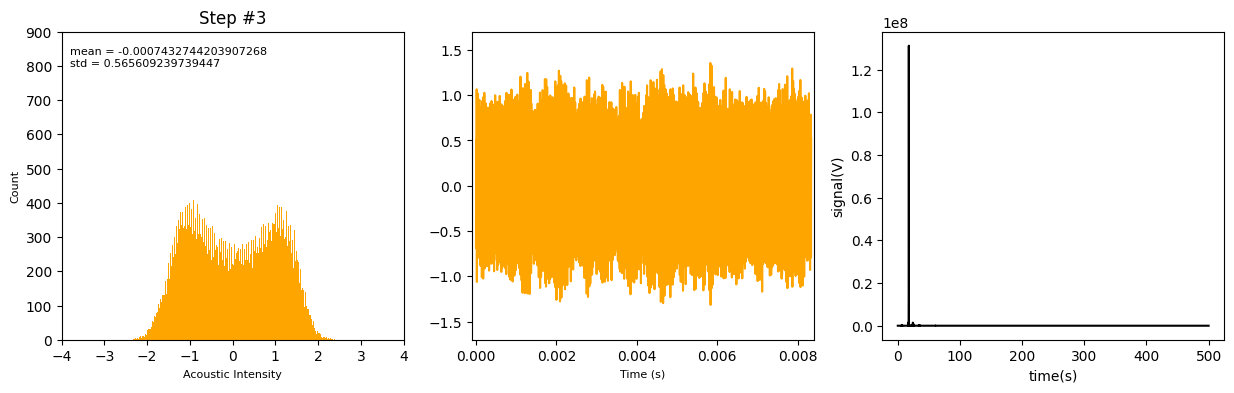

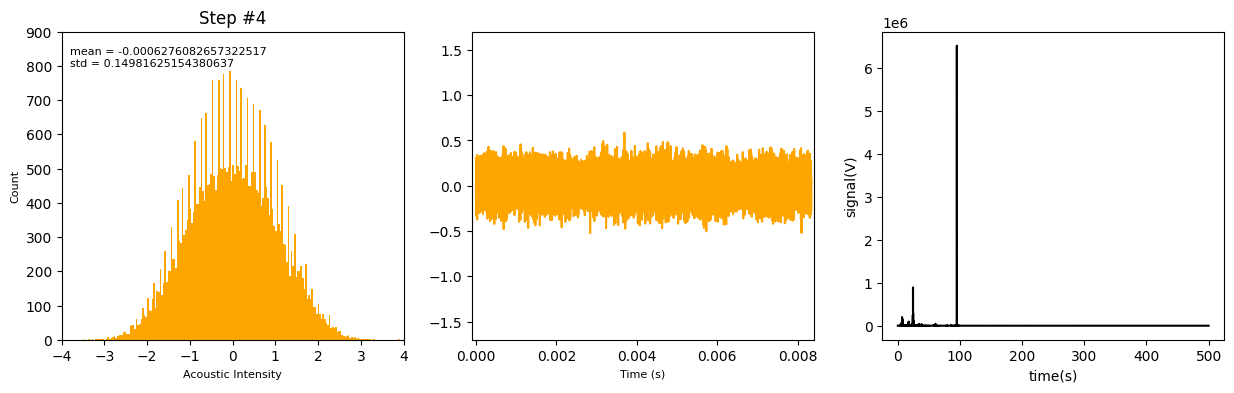

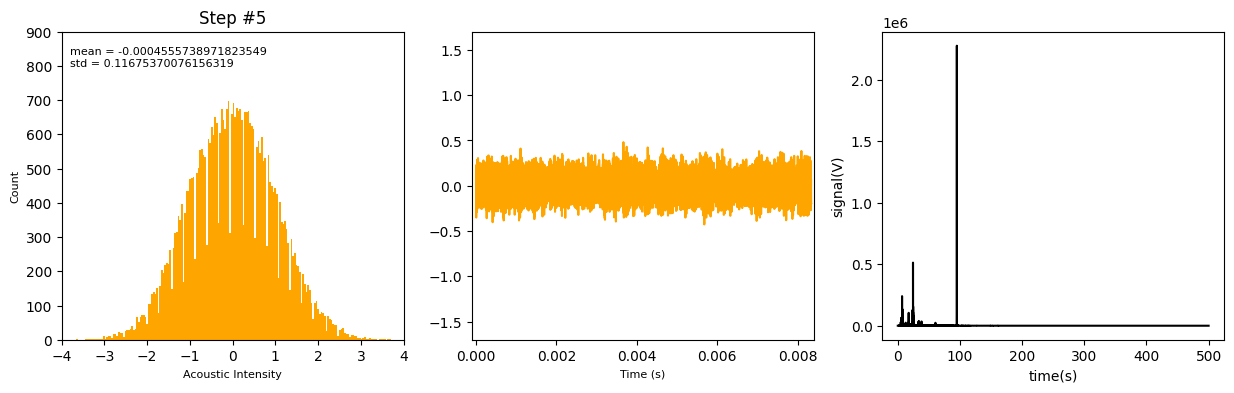

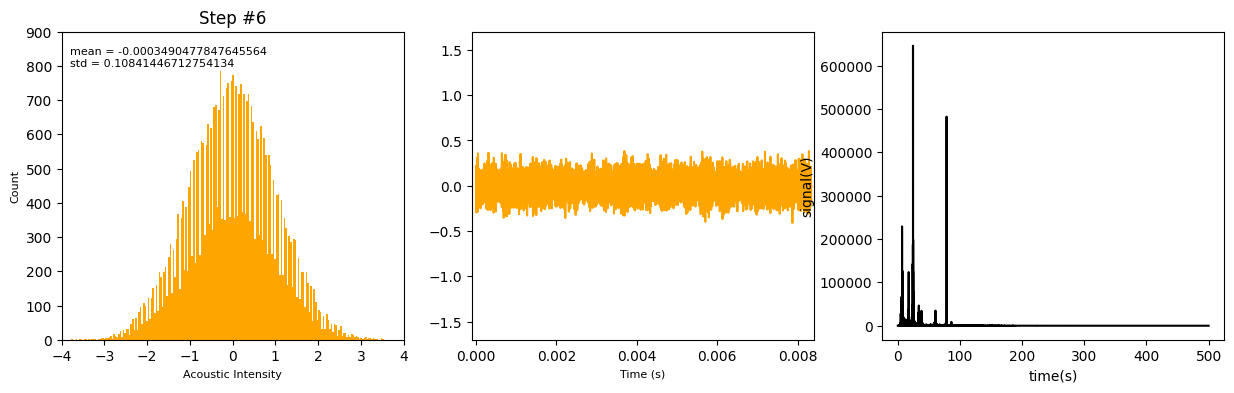

In [46]:
## PLOTTING
color = "orange"
markerColor = "b*"
previousLoad = -1

for step,path in enumerate(dataFilesPath):

    partialLoad = 100/len(dataFilesPath)
    currentLoad = round(step*partialLoad)

    idx,dataPoints = getDataPoints(dataFilesPath[step])
    #### GETTING MEAN, STD, AND ZSCORE OF DATA
    meanDataPoints = np.mean(dataPoints)
    stdDataPoints = np.std(dataPoints)
    zscoreDataPoints = [(x-meanDataPoints)/stdDataPoints for x in dataPoints]

    #### PLOTTING DATA
    ## PLOTTING SIDE BY SIDE
    figure, axs = plt.subplots(nrows=1, ncols= 3, figsize=(15,4))
    txt = f"mean = {meanDataPoints}\nstd = {stdDataPoints}"
    name = f"Step #{step}"

    axs[0].hist(zscoreDataPoints, bins = 200, color=color)
    axs[0].set_title(name)
    axs[0].set_xlabel("Acoustic Intensity", fontsize=8)
    axs[0].set_ylabel("Count", fontsize=8)
    axs[0].text(-3.8, 800, txt, fontsize=8)
    axs[0].set(xlim =(-4, 4), ylim =(0, 900))

    axs[1].plot(idx,dataPoints, color=color)
    axs[1].set_xlabel("Time (s)", fontsize=8)
    axs[1].set(xlim =(-0.0001, 0.0084), ylim =(-1.7, 1.7))
    
    n=len(dataPoints)
    f_fft = np.fft.fft(dataPoints,n)
    psd = f_fft * np.conj(f_fft)
    freq = (1/(dt*n)) * np.arange(n) 
    L = np.arange (1.,np.floor(n/2),dtype='int')
    
    # ax[2].plot(t,recons,color='m')
    axs[2].plot(freq[L],psd[L],color='k')
    # ax[2].set_grid(True)
    # axs[2].set_xlim(0,.5)
    axs[2].set_xlabel("time(s)",position=(0.95,1))
    axs[2].set_ylabel("signal(V)",position=(1,0.9))
    
    plt.show()
